IMPORT LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

LOAD EXCEL DATA

In [3]:
df = pd.read_excel(r"C:\Users\LENOVO\Downloads\Superstore\Superstore1.csv.xlsx")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,First name,Last Name,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Segment
0,1,CA-2016-152156,2016-08-11 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire,Gute,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Consumer
1,2,CA-2016-152156,2016-08-11 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire,Gute,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,Consumer
2,3,CA-2016-138688,2016-12-06 00:00:00,6/16/2016,Second Class,DV-13045,Darrin,Van Huff,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,Corporate
3,4,US-2015-108966,2015-11-10 00:00:00,10/18/2015,Standard Class,SO-20335,Sean,O'Donnell,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,Consumer
4,5,US-2015-108966,2015-11-10 00:00:00,10/18/2015,Standard Class,SO-20335,Sean,O'Donnell,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Consumer


BASIC DATA CHECKS
data cleaning checks any null values 
counts the null values and duplicates

In [4]:
df.info()
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Ship Date     9994 non-null   object 
 4   Ship Mode     9994 non-null   object 
 5   Customer ID   9994 non-null   object 
 6   First name    9994 non-null   object 
 7   Last Name     9986 non-null   object 
 8   City          9994 non-null   object 
 9   State         9994 non-null   object 
 10  Postal Code   9994 non-null   int64  
 11  Region        9994 non-null   object 
 12  Product ID    9994 non-null   object 
 13  Category      9994 non-null   object 
 14  Sub-Category  9994 non-null   object 
 15  Product Name  9994 non-null   object 
 16  Sales         9994 non-null   float64
 17  Quantity      9994 non-null   int64  
 18  Discount      9994 non-null 

0

In [12]:
#Remove duplicates:
df.drop_duplicates(inplace=True)
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,First name,Last Name,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Segment,Year,Month,Day_Type
9989,9990,CA-2014-110422,2014-01-21,1/23/2014,Second Class,TB-21400,Tom,Boeckenhauer,Miami,Florida,...,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028,Consumer,2014,1,Weekday
9990,9991,CA-2017-121258,2017-02-26,2017-03-03 00:00:00,Standard Class,DB-13060,Dave,Brooks,Costa Mesa,California,...,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332,Consumer,2017,2,Weekend
9991,9992,CA-2017-121258,2017-02-26,2017-03-03 00:00:00,Standard Class,DB-13060,Dave,Brooks,Costa Mesa,California,...,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932,Consumer,2017,2,Weekend
9992,9993,CA-2017-121258,2017-02-26,2017-03-03 00:00:00,Standard Class,DB-13060,Dave,Brooks,Costa Mesa,California,...,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200,Consumer,2017,2,Weekend
9993,9994,CA-2017-119914,2017-04-05,2017-09-05 00:00:00,Second Class,CC-12220,Chris,Cortes,Westminster,California,...,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480,Consumer,2017,4,Weekday


 DATE HANDLING

In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day_Type'] = df['Order Date'].dt.dayofweek.apply(
    lambda x: 'Weekend' if x >= 5 else 'Weekday'
)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,First name,Last Name,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Segment,Year,Month,Day_Type
0,1,CA-2016-152156,2016-08-11,2016-11-11 00:00:00,Second Class,CG-12520,Claire,Gute,Henderson,Kentucky,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Consumer,2016,8,Weekday
1,2,CA-2016-152156,2016-08-11,2016-11-11 00:00:00,Second Class,CG-12520,Claire,Gute,Henderson,Kentucky,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,Consumer,2016,8,Weekday
2,3,CA-2016-138688,2016-12-06,6/16/2016,Second Class,DV-13045,Darrin,Van Huff,Los Angeles,California,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,Corporate,2016,12,Weekday
3,4,US-2015-108966,2015-11-10,10/18/2015,Standard Class,SO-20335,Sean,O'Donnell,Fort Lauderdale,Florida,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,Consumer,2015,11,Weekday
4,5,US-2015-108966,2015-11-10,10/18/2015,Standard Class,SO-20335,Sean,O'Donnell,Fort Lauderdale,Florida,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Consumer,2015,11,Weekday


SALES & PROFIT ANALYSIS

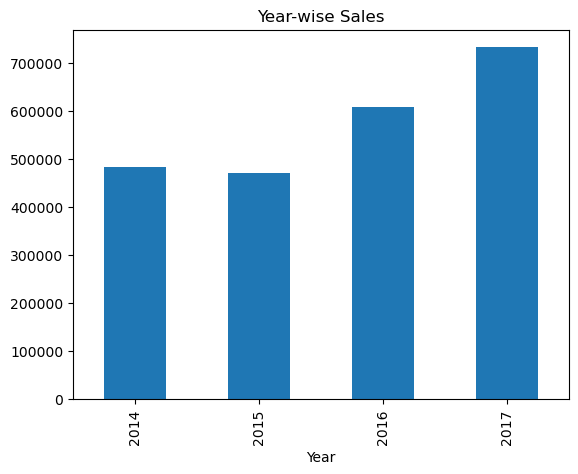

In [13]:
#Year-wise Sales
year_sales = df.groupby('Year')['Sales'].sum()
year_sales.plot(kind='bar', title='Year-wise Sales')
plt.show()

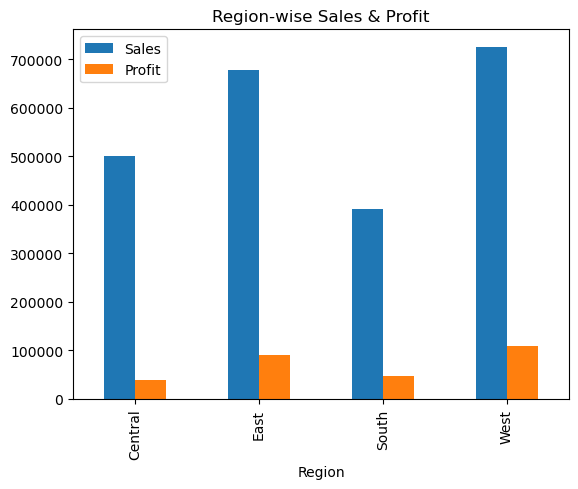

In [14]:
#Region-wise Sales & Profit
region_sales = df.groupby('Region')[['Sales','Profit']].sum()
region_sales.plot(kind='bar', title='Region-wise Sales & Profit')
plt.show()

TOP CUSTOMERS

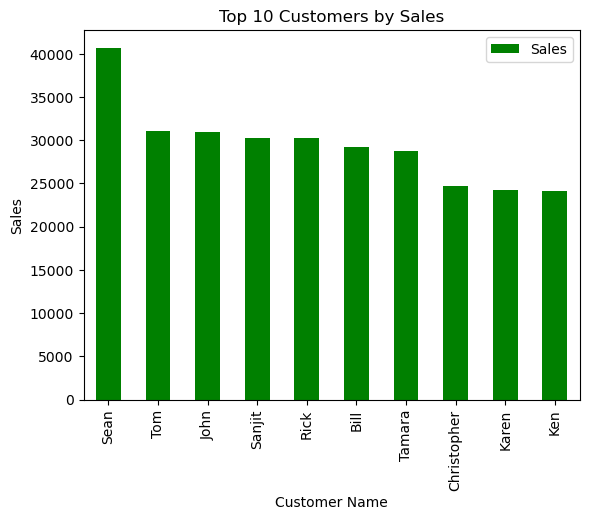

In [21]:
top_customers = df.groupby('First name')['Sales'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', title='Top 10 Customers by Sales',color='green')
plt.xlabel('Customer Name')
plt.ylabel('Sales')
plt.legend()
plt.show()

CATEGORY PERFORMANCE

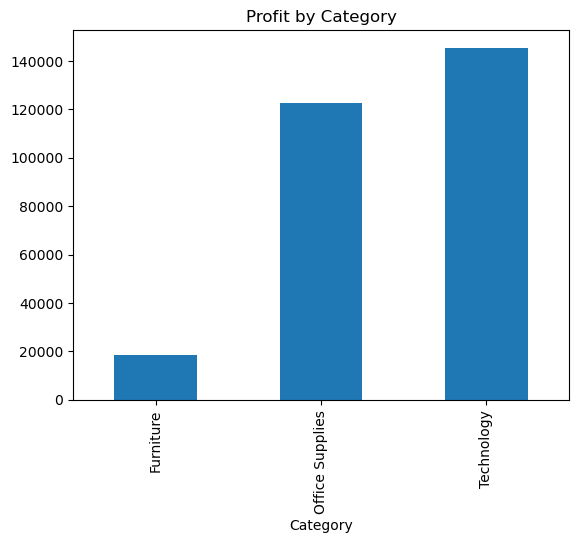

In [23]:
category_profit = df.groupby('Category')['Profit'].sum()
category_profit.plot(kind='bar', title='Profit by Category')

plt.show()

In [29]:
category_data = df.groupby('Category')[['Sales', 'Profit']].sum()

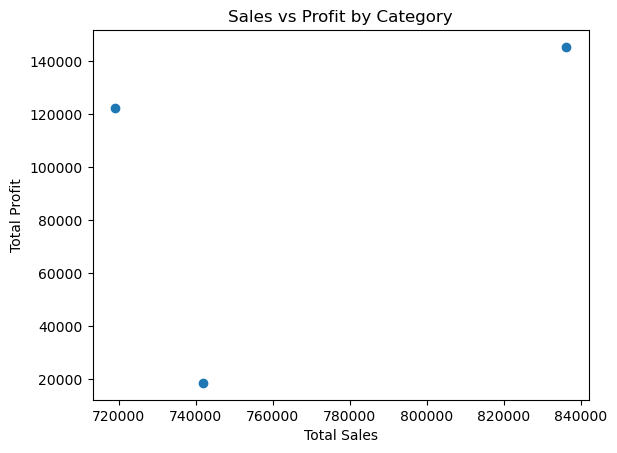

In [30]:
#category using saccter plot

plt.scatter(category_data['Sales'], category_data['Profit'])
plt.title('Sales vs Profit by Category')
plt.xlabel('Total Sales')
plt.ylabel('Total Profit')
plt.show()

WEEKDAY vs WEEKEND SALES

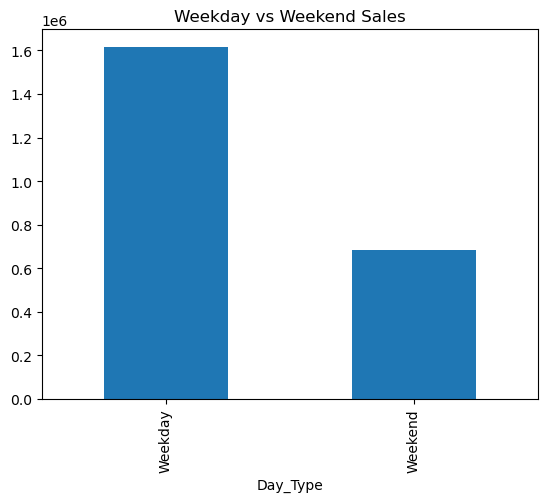

In [31]:
day_sales = df.groupby('Day_Type')['Sales'].sum()
day_sales.plot(kind='bar', title='Weekday vs Weekend Sales')
plt.show()

SHIPPING ANALYSIS

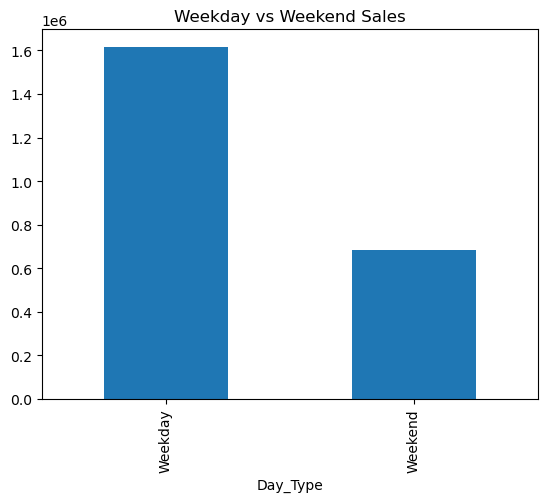

In [32]:
day_sales = df.groupby('Day_Type')['Sales'].sum()
day_sales.plot(kind='bar', title='Weekday vs Weekend Sales')
plt.show()

In [33]:
print("Key Insights:")
print("- Identified high-performing regions and categories")
print("- Found top customers contributing to revenue")
print("- Compared weekday vs weekend sales trends")
print("- Analyzed shipping modes and order distribution")

Key Insights:
- Identified high-performing regions and categories
- Found top customers contributing to revenue
- Compared weekday vs weekend sales trends
- Analyzed shipping modes and order distribution
